# EDA with Personal Email

- Loading the dataset
- Data transformation
- Data analysis

## Loading the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mailbox

mboxfile = 'data/gmail.mbox'
mbox = mailbox.mbox(mboxfile)
mbox

In [5]:
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
X-MSFBL
DKIM-Signature
From
Message-ID
List-Unsubscribe
List-Unsubscribe-Post
To
Date
Content-Type
MIME-Version
Subject
Reply-To


## Data transformation

### Data cleansing

Although there area a lot of objects returned by the extracted data, we do not need all the items. We will only extract the required fields.

In [9]:
import csv

#create csv file with only the required attributes
with open('data/mailbox.csv','w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject', 'from', 'date', 'to', 'label', 'thread'])
    for message in mbox:
        writer.writerow([
                         message['subject'],
                         message['from'],
                         message['date'],
                         message['to'],
                         message['X-Gmail-Labels'],
                         message['X-GM-THRID']
                        ])


In [10]:
#generate dataframe with the csv file 
dfs = pd.read_csv('data/mailbox.csv', names = ['subject', 'from', 'date', 'to', 'label', 'thread'])

In [11]:
dfs.dtypes

#convert the date into a DateTime argument
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))


In [12]:
#remove NaN values from the field
dfs = dfs[dfs['date'].notna()]

In [13]:
#save the df into a separate CSV file
dfs.to_csv('gmail.csv')

In [14]:
#Apply descriptive statistics techniques
dfs.info() 
dfs.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 16266 entries, 1 to 17515
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  16259 non-null  object             
 1   from     16266 non-null  object             
 2   date     16266 non-null  datetime64[ns, UTC]
 3   to       16231 non-null  object             
 4   label    16266 non-null  object             
 5   thread   16266 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 889.5+ KB


,subject,from,date,to,label,thread
1,=?utf-8?B?8J+RjyBTbWFydGVzdC4gUmVzb2x1dGlvbi4g...,"""Brilliant"" <notifications@account.brilliant.org>",2025-01-06 11:30:59+00:00,abrilibarra3095@gmail.com,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Cambios,No...",1820498917125846260
3,=?UTF-8?B?wqFFc3RlIGZpbmRlIG5vcyB2ZW1vcyBlbiBO...,=?UTF-8?B?QmFuY28gTmFjacOzbg==?= <info@mailing...,2025-01-03 17:51:11+00:00,<ABRILIBARRA3095@GMAIL.COM>,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Promocione...",1820251048193091181
4,Viz of the Day,Tableau Public <visualanalysis@data.tableau.com>,2025-01-07 18:05:28+00:00,abrilibarra3095@gmail.com,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Promocione...",1820614361676700910
5,=?utf-8?Q?What=20Surprised=20Me=20This=20Year=...,Quanta Magazine <Quanta@SimonsFoundation.org>,2024-12-23 13:15:03+00:00,=?utf-8?Q?=20?= <Abrilibarra3095@gmail.com>,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Cambios,No...",1819238372310064272
7,=?utf-8?B?8J+ToyBHcmFuZGVzIGFob3Jyb3MgZGUgQcOx...,"""Coursera"" <Coursera@m.learn.coursera.org>",2024-12-26 15:10:57+00:00,abrilibarra3095@gmail.com,"=?UTF-8?Q?Recibidos,Abierto,Categor=C3=ADa:_Pr...",1819516189802510010
8,=?UTF-8?Q?Abril_Magali_Queremos_Escucharte_=F0...,Experiencia Movistar <Movistar@express.fra1.me...,2024-12-31 16:38:44+00:00,Abril Magali Ibarra <abrilibarra3095@gmail.com>,"=?UTF-8?Q?Recibidos,Abierto,Categor=C3=ADa:_Pr...",1819974698089451528
9,[Exactas] =?utf-8?b?UmVzb2x1Y2nDs24gKENEKSBOwr...,=?UTF-8?Q?Secretar=C3=ADa_General_-_FCEN-_UBA?...,2024-12-17 21:30:23+00:00,"lista-interna@listas.exactas.uba.ar,\r\n Estud...","=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Cambios,No...",1818724716148505222
10,Te regalamos =?UTF-8?B?JDUuNTAw8J+agA==?=,PedidosYa <newsletter@em.pedidosya.com>,2024-12-27 23:15:16+00:00,abrilibarra3095@gmail.com,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Promocione...",1819637257436879452
12,=?UTF-8?Q?_=F0=9F=8E=81_Hasta_18_cuotas_sin_in...,Musimundo <envios@musimundo.com>,2024-12-16 12:12:23+00:00,abrilibarra3095@gmail.com,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Promocione...",1818598985286321144
13,=?utf-8?q?=F0=9F=8F=81_=C2=A1Avanzaste_mucho!_...,Duolingo <hello@duolingo.com>,2024-12-28 03:59:58+00:00,abrilibarra3095@gmail.com,"=?UTF-8?Q?Recibidos,Categor=C3=ADa:_Cambios,No...",1819655169002977037


We noticed that the *from* field contains both the name and the email. We can use a regular expression to refactor the column, we just need to extract an email address from that field.

A regular expression is a sequence of characters and special metacharacters(por example | represents OR operator) used to match a set of character strings. Regular expression allow you to be more expressive with string-matching operations than just providing a simple substring.


In [16]:
#data refactoring
import re
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan
    
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))
 
myemail = 'abrilibarra3095@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [17]:
#dropping columns
dfs.drop(columns='to', inplace=True)
dfs.head(10)

,subject,from,date,label,thread
1,=?utf-8?B?8J+RjyBTbWFydGVzdC4gUmVzb2x1dGlvbi4g...,notifications@account.brilliant.org,2025-01-06 11:30:59+00:00,inbox,1820498917125846260
3,=?UTF-8?B?wqFFc3RlIGZpbmRlIG5vcyB2ZW1vcyBlbiBO...,info@mailing.bna.com.ar,2025-01-03 17:51:11+00:00,inbox,1820251048193091181
4,Viz of the Day,visualanalysis@data.tableau.com,2025-01-07 18:05:28+00:00,inbox,1820614361676700910
5,=?utf-8?Q?What=20Surprised=20Me=20This=20Year=...,Quanta@SimonsFoundation.org,2024-12-23 13:15:03+00:00,inbox,1819238372310064272
7,=?utf-8?B?8J+ToyBHcmFuZGVzIGFob3Jyb3MgZGUgQcOx...,Coursera@m.learn.coursera.org,2024-12-26 15:10:57+00:00,inbox,1819516189802510010
8,=?UTF-8?Q?Abril_Magali_Queremos_Escucharte_=F0...,Movistar@express.fra1.medallia.eu,2024-12-31 16:38:44+00:00,inbox,1819974698089451528
9,[Exactas] =?utf-8?b?UmVzb2x1Y2nDs24gKENEKSBOwr...,secretaria_general@de.fcen.uba.ar,2024-12-17 21:30:23+00:00,inbox,1818724716148505222
10,Te regalamos =?UTF-8?B?JDUuNTAw8J+agA==?=,newsletter@em.pedidosya.com,2024-12-27 23:15:16+00:00,inbox,1819637257436879452
12,=?UTF-8?Q?_=F0=9F=8E=81_Hasta_18_cuotas_sin_in...,envios@musimundo.com,2024-12-16 12:12:23+00:00,inbox,1818598985286321144
13,=?utf-8?q?=F0=9F=8F=81_=C2=A1Avanzaste_mucho!_...,hello@duolingo.com,2024-12-28 03:59:58+00:00,inbox,1819655169002977037


In [18]:
#refactorizing timezones
import datetime
import pytz

def refactor_timezone(x):
    est = pytz.timezone('America/Buenos_Aires')
    return x.astimezone(est)

dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.strftime('%A'))
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered= True)
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
dfs['hour']= dfs['date'].apply(lambda x: x.hour)
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)
dfs.index = dfs['date']
del dfs['date']

## Data analysis

This is the part where we gain insights from the data that we have.
Let's answer the following questions one by one:
1. How many emails did I send during a given timeframe?
2. At what times of the day do I send and receive emails with Gmail?
3. What is the average number of emails per day?
4. What is the average number of emails per hour?
5. Whom do I communicate with most frequently?
6. What are the most active emailing days?
7. What am I mostly emailing about?

In [21]:
#number of emails
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())


Mon, 21 Jan 2019 12:37 AM
Wed, 08 Jan 2025 02:15 PM
label
inbox    16263
sent         3
Name: count, dtype: int64


1. I send three emails between 21 Jan 2019 and 08 Jan 2025.

<Axes: title={'center': 'Received'}>

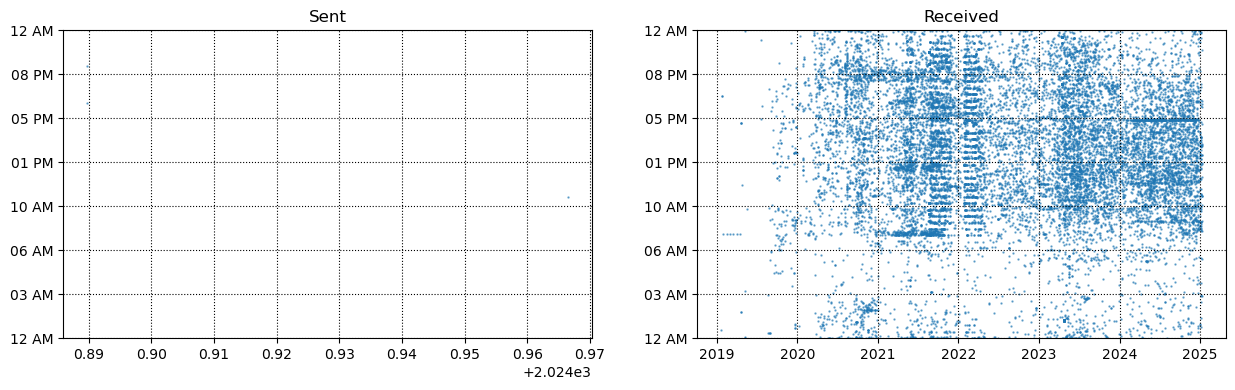

In [23]:
#time of day
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

from matplotlib.ticker import MaxNLocator 
from scipy import ndimage
from matplotlib.ticker import FixedLocator

#create a ploting function
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    df.plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0,24)
    
    yticks = np.linspace(0, 24, 8) 
    ax.yaxis.set_major_locator(FixedLocator(yticks))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p") for ts in yticks])

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')

    return ax

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

2. Although I didn't send many emails, the graph shows that most of them were sent between 5:00 PM and 9:00 PM. Additionally, I generally receive emails throughout the day, starting at 6:00 AM.

In [25]:
## average emails per day and hour

def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    """
    Plots a histogram showing the average number of emails sent per day over a range of years, 
    normalized by the time interval.

    Parameters:

    df: DataFrame containing a year column.
    ax: Matplotlib Axes object for plotting.
    label: Optional label for the legend.
    dt: Bin size in years (default is 0.3).
    plot_kwargs: Additional styling options for the plot.
    """
    #Extract the 'year' column, filtering out missing values.
    year = df[df['year'].notna()]['year'].values
    #Total range of years
    T = year.max()-year.min()
    bins = int(T/dt)
    if bins == 0 :
        bins = 1
    #Calculate weights to normalize the histogram:
    #Each entry contributes equally to the average per year.
    weights = 1/ (np.ones_like(year)*dt*365.25)
    ax.hist(year, bins=bins, weights = weights, label=label, **plot_kwargs)
    ax.grid(ls=':', color='k')

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False, weight_fun=None, **plot_kwargs):
    """
    Plots a histogram showing the average number of emails sent per hour in a day, 
    normalized by the time interval. Supports smoothing with a Gaussian filter.

    Parameters:
    df: DataFrame with timeofday (hour) and year columns.
    ax: Matplotlib Axes object for plotting.
    label: Optional label for the legend.
    dt: Bin size in hours (default is 1).
    smooth: Whether to apply smoothing (default is False).
    weight_fun: Optional custom function to calculate bin weights.
    plot_kwargs: Additional styling options for the plot.
    """
    # Extract the 'timeofday' (hour) and 'year' columns, filtering out missing values.
    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    
    # Calculate the total range of years and hours of the day.
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    
    # Determine weights for normalization.
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights)
        x = np.delete(xedges, -1) + 0.5 * (xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs)

    # Add grid for better readability.
    ax.grid(ls=':', color='k')
    
    # Determine orientation and set tick positions and labels.
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ticks = ax.get_xticks()
        ax.set_xticks(ticks)  # Ensure ticks are explicitly set.
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ticks])
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ticks = ax.get_yticks()
        ax.set_yticks(ticks)  # Ensure ticks are explicitly set.
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ticks])


In [26]:
#class that plots the time of the day versus year for all the emails within the given timeframe
class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6,6)
        self.ax1 = plt.subplot(gs[2:6,:4])
        self.ax2 = plt.subplot(gs[2:6,4:6], sharey = self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False)
        self.ax3 = plt.subplot(gs[:2, :4])
        plt.setp(self.ax3.get_xticklabels(), visible=False)

    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average emails per hour')
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
        self.ax3.set_ylabel('Average emails per day')



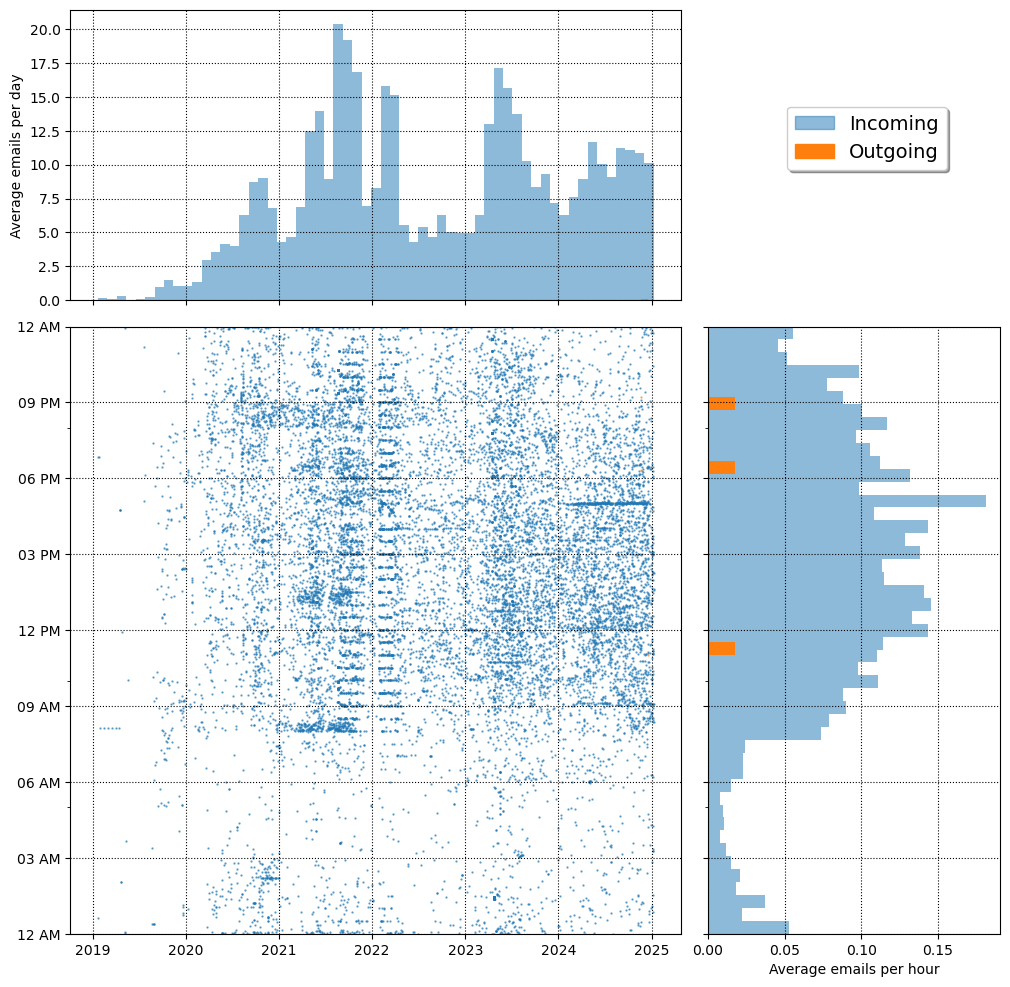

In [27]:
plt.figure(figsize=(12,12))
tp1=TriplePlot()

tp1.plot(received, color='C0', alpha=0.5)
tp1.plot(sent, color='C1', alpha=1)
p1= mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2= mpatches.Patch(color='C1', label='Outgoing', alpha=1)
plt.legend(handles=[p1,p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True)


<Axes: xlabel='dayofweek'>

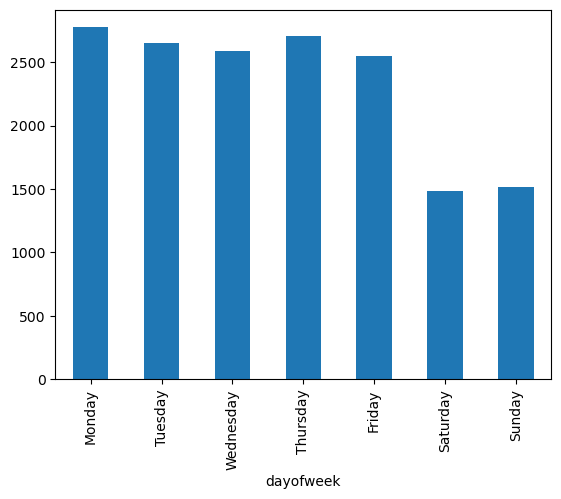

In [28]:
#Number of emails per day
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

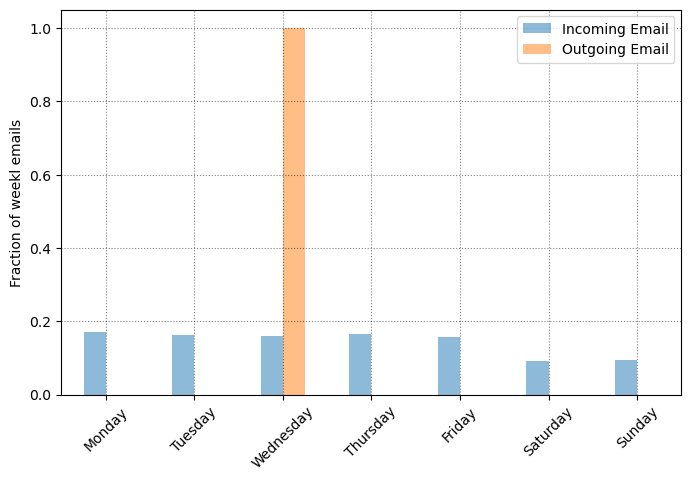

In [29]:
sdw = sent.groupby('dayofweek', observed=False).size()/len(sent)
rdw = received.groupby('dayofweek', observed=False).size()/len(received)

df_tmp = pd.DataFrame(data={'Incoming Email':rdw, 'Outgoing Email':sdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('')
plt.ylabel('Fraction of weekl emails')
plt.grid(ls=':', color='k', alpha=0.5)

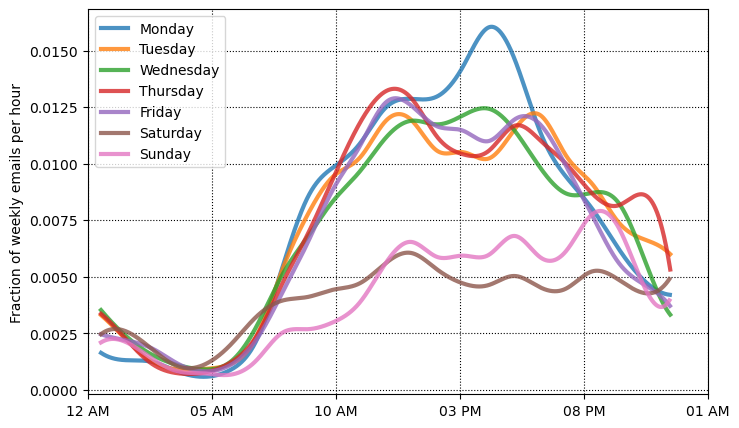

In [30]:
#Most active time of day for email communication (received)
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r))/len(received)
    wfun= lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}', alpha = 0.8, lw=3, label=dow, weight_fun=wfun)
    ax.set_ylabel('Fraction of weekly emails per hour')
    plt.legend(loc='upper left')

My most active days receiving emails were Monday and Thursday.

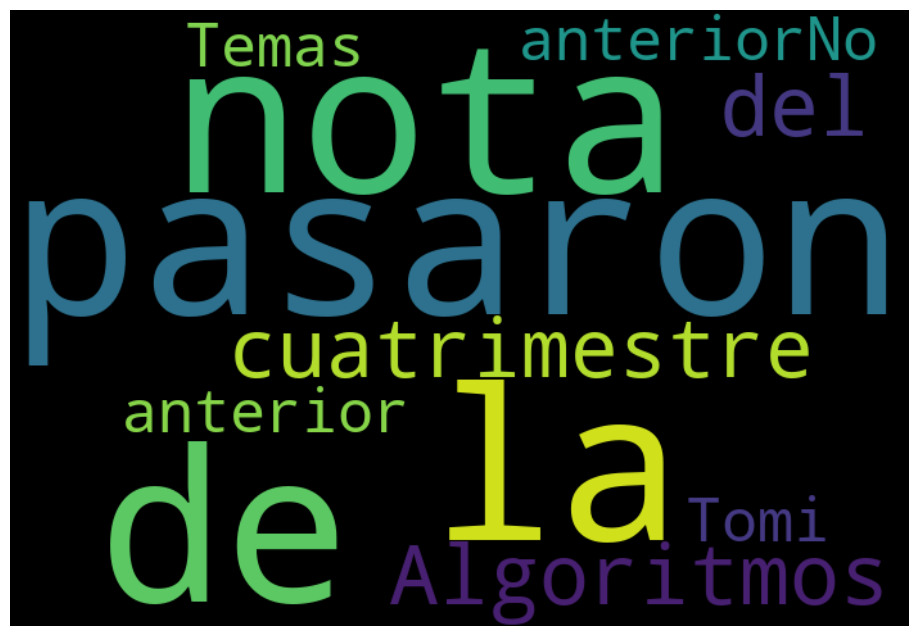

In [63]:
#Most frequently used words
from wordcloud import WordCloud

df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ''.join(map(str, sent['subject'].values))
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud= wrd.generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)